In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Houses.csv', encoding= "ISO-8859-1")

In [6]:
df.columns

Index(['Unnamed: 0', 'address', 'city', 'floor', 'id', 'latitude', 'longitude',
       'price', 'rooms', 'sq', 'year'],
      dtype='object')

In [7]:
df.head()

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,1,Praga-Po³udnie Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,3,Grunwald,Poznañ,2.0,4315.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0


In [17]:
df = df[['address', 'city', 'floor', 'id', 'latitude', 'longitude',
       'price', 'rooms', 'sq', 'year']]

In [18]:
df['city'] = df['city'].map(lambda x: 'Poznan' if x=='Poznañ' else 'Krakow' if x=='Kraków' else x)
df['city'].unique()

C:\Users\annam\AppData\Local\Temp\ipykernel_12360\1845216514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'] = df['city'].map(lambda x: 'Poznan' if x=='Poznañ' else 'Krakow' if x=='Kraków' else x)


array(['Krakow', 'Warszawa', 'Poznan'], dtype=object)

In [19]:
df['full_address'] = df['city']+', '+df['address']

In [20]:
df.head()

,address,city,floor,id,latitude,longitude,price,rooms,sq,year,full_address
0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Krakow,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0,"Krakow, Podgórze Zab³ocie Stanis³awa Klimeckiego"
1,Praga-Po³udnie Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0,"Warszawa, Praga-Po³udnie Grochowska"
2,Krowodrza Czarnowiejska,Krakow,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0,"Krakow, Krowodrza Czarnowiejska"
3,Grunwald,Poznan,2.0,4315.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0,"Poznan, Grunwald"
4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0,"Warszawa, Ochota Gotowy budynek. Stan dewelope..."


In [21]:
y = df['price']

In [22]:
X = df.drop(['id','address','price','full_address','latitude','longitude'],axis=1)
X.head()

,city,floor,rooms,sq,year
0,Krakow,2.0,3.0,74.05,2021.0
1,Warszawa,3.0,1.0,24.38,2021.0
2,Krakow,2.0,2.0,37.00,1970.0
3,Poznan,2.0,5.0,166.00,1935.0
4,Warszawa,1.0,5.0,105.00,2020.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23764 entries, 0 to 23763
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       23764 non-null  object 
 1   city          23764 non-null  object 
 2   floor         23764 non-null  float64
 3   id            23764 non-null  float64
 4   latitude      23764 non-null  float64
 5   longitude     23764 non-null  float64
 6   price         23764 non-null  float64
 7   rooms         23764 non-null  float64
 8   sq            23764 non-null  float64
 9   year          23764 non-null  float64
 10  full_address  23764 non-null  object 
dtypes: float64(8), object(3)
memory usage: 2.0+ MB


In [25]:
df.isnull().sum()

address         0
city            0
floor           0
id              0
latitude        0
longitude       0
price           0
rooms           0
sq              0
year            0
full_address    0
dtype: int64

In [26]:
%matplotlib inline

In [28]:
# remove Scientific Notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Exploratory Data Analysis and Visualization

<AxesSubplot:>

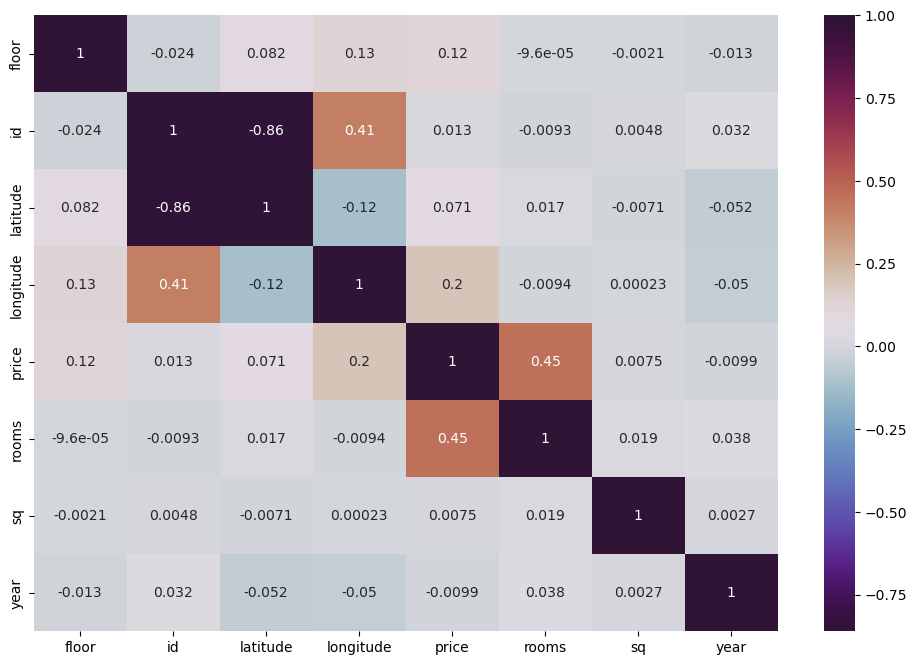

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='twilight_shifted')

In [38]:
df.describe()

,floor,id,latitude,longitude,price,rooms,sq,year
count,23764.00,23764.00,23764.00,23764.00,23764.00,23764.00,23764.00,23764.00
mean,2.81,15621.96,51.37,19.86,649353.65,2.62,102.72,2000.55
std,2.46,8617.29,1.10,1.45,532696.99,1.00,6533.69,48.31
min,0.00,1.00,49.93,4.20,5000.00,1.00,8.80,70.00
25%,1.00,8420.75,50.07,19.92,411546.12,2.00,42.00,1985.00
50%,2.00,15637.50,52.19,20.00,520000.00,3.00,53.89,2019.00
75%,4.00,23111.25,52.27,21.00,699999.00,3.00,68.91,2021.00
max,10.00,30308.00,54.44,30.32,15000000.00,10.00,1007185.00,2980.00


In [39]:
df01 = df[(df['year']<=2025) & (df['year']>=1985)]

In [40]:
df01 = df01[df['sq']<=8000]

C:\Users\annam\AppData\Local\Temp\ipykernel_12360\4009786479.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df01 = df01[df['sq']<=8000]


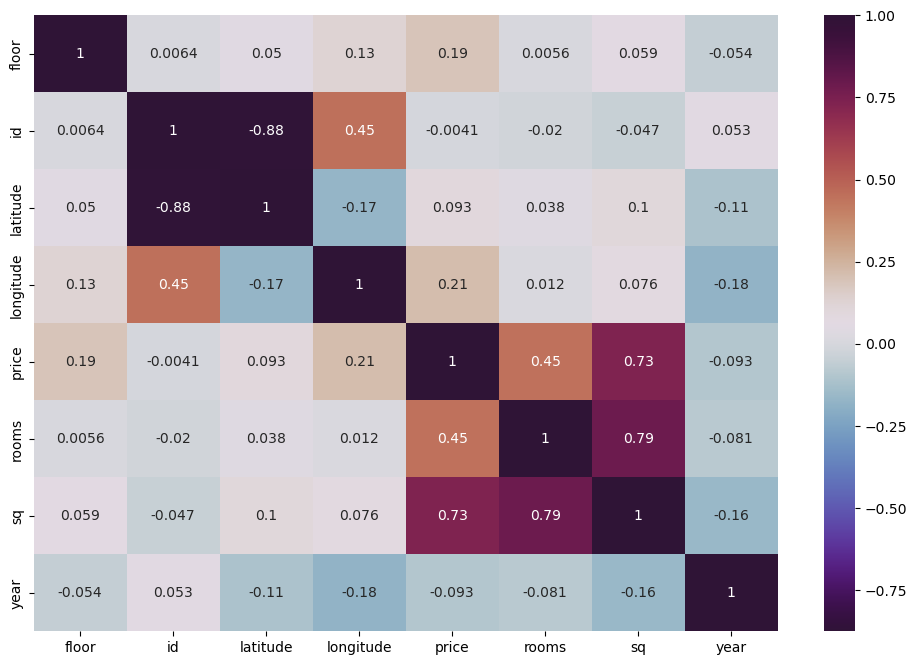

In [42]:
plt.figure(figsize=(12,8))
# twilight_shifted, Pastel2, PuOr, coolwarm
sns.heatmap(df01.corr(), annot=True, cmap='twilight_shifted')
plt.show()

In [43]:
X.columns

Index(['city', 'floor', 'rooms', 'sq', 'year'], dtype='object')

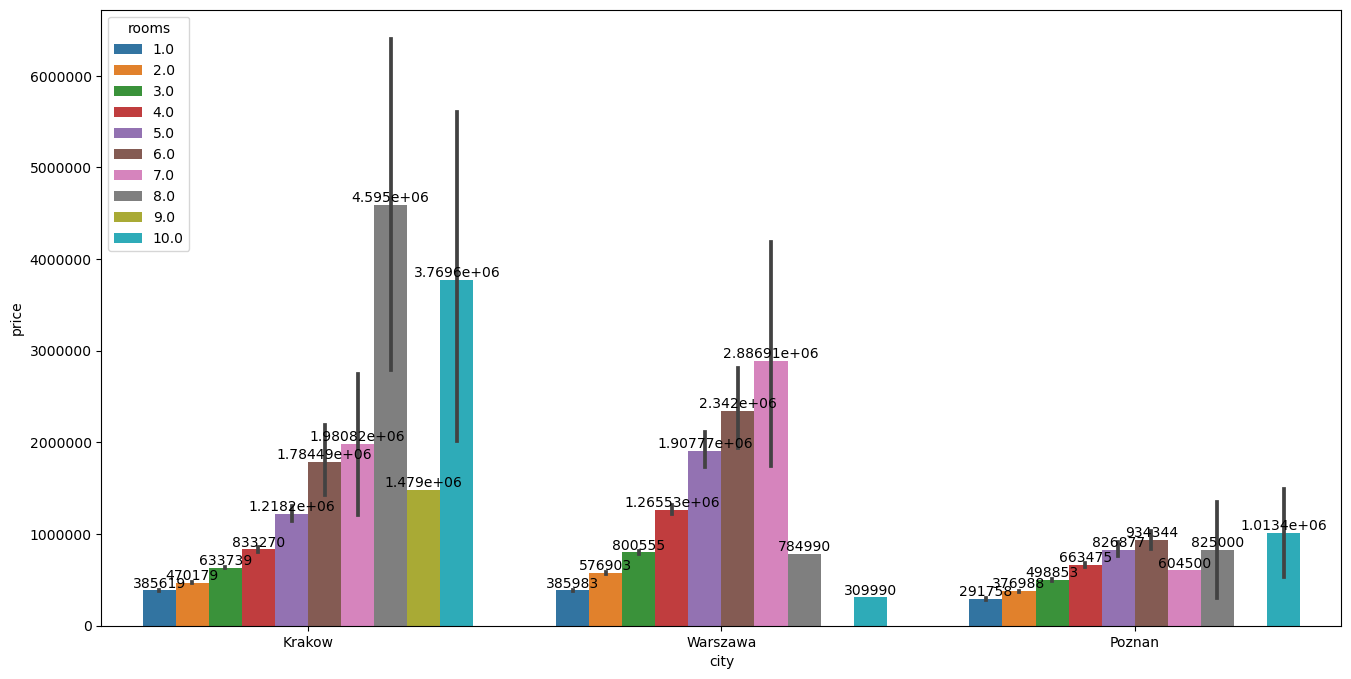

In [45]:
plt.figure(figsize=(16,8))
# get rid of scientific notation
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
ax = sns.barplot(data=df,x='city',y='price',hue='rooms')
for container in ax.containers:
    ax.bar_label(container)

<AxesSubplot:xlabel='rooms', ylabel='price'>

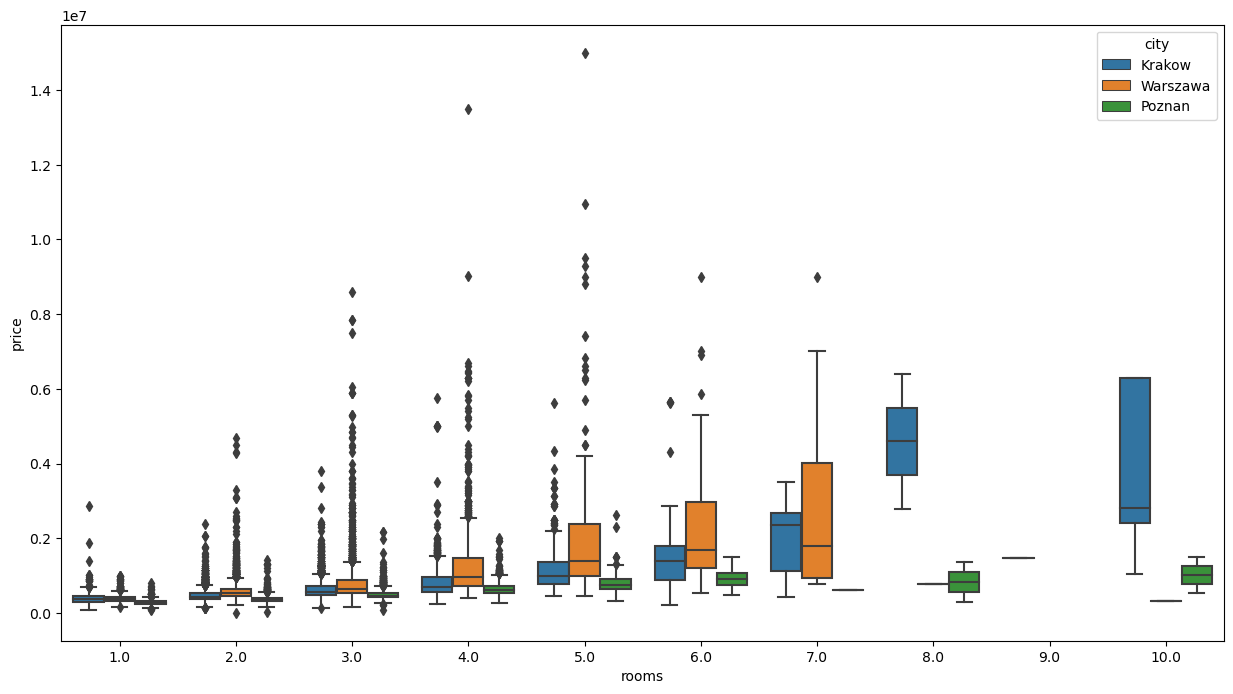

In [46]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df,x='rooms',y='price',hue='city')

C:\Users\annam\anaconda3\lib\site-packages\seaborn\distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


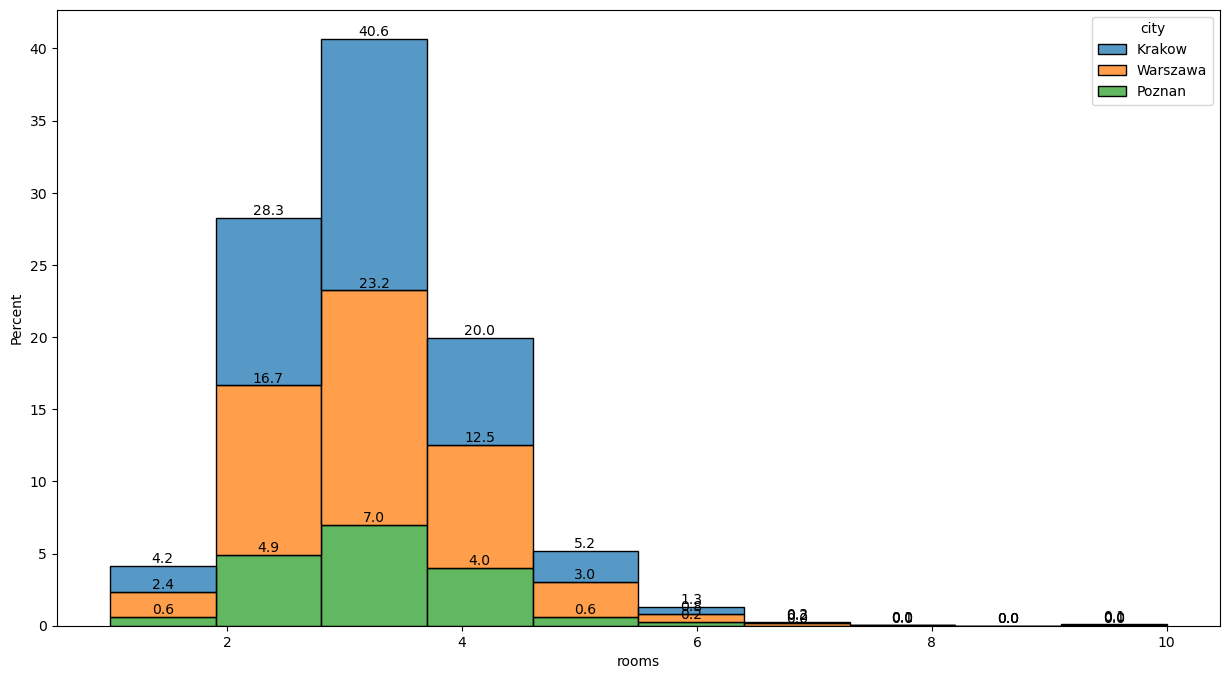

In [47]:
plt.figure(figsize=(15,8))
ax = sns.histplot(data=df,x='rooms',hue='city',multiple="stack",weights='rooms',stat='percent')
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')

C:\Users\annam\anaconda3\lib\site-packages\seaborn\distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


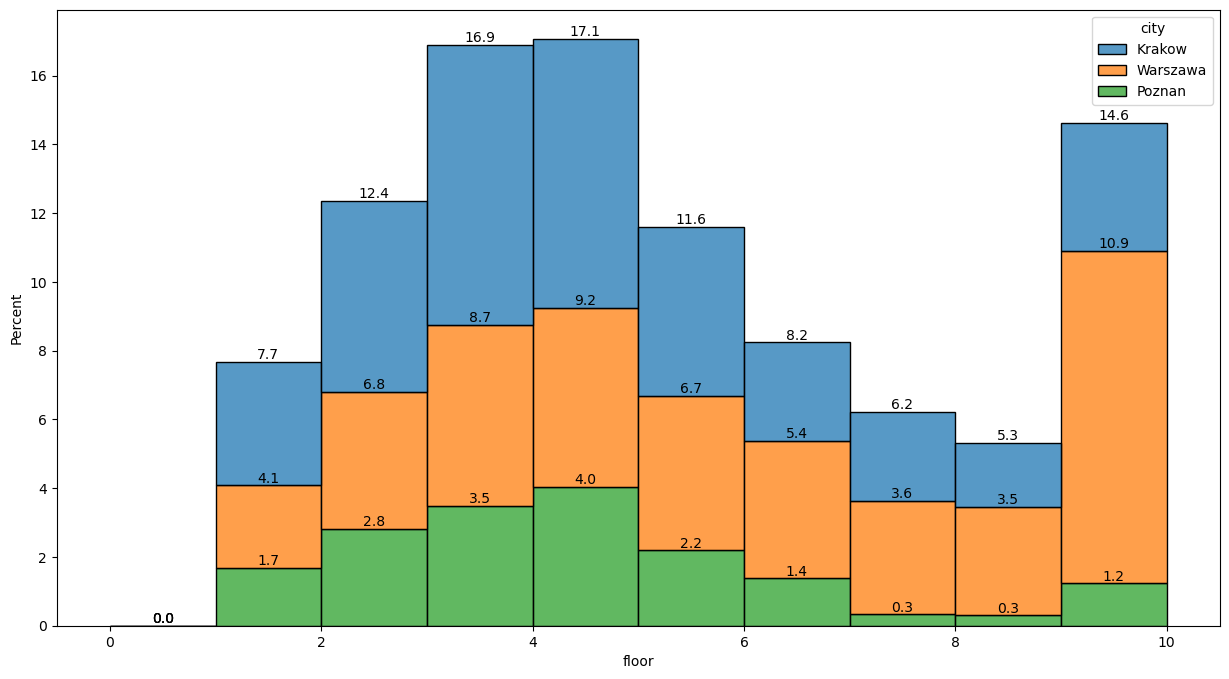

In [49]:
plt.figure(figsize=(15,8))
ax = sns.histplot(data=df,x='floor',hue='city',multiple="stack",weights='floor',stat='percent')
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')

# Preparation

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score
import xgboost as xgb

In [52]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# Bagging
models.append(('RFR', RandomForestRegressor()))

# Boosting 
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('XGB', xgb.XGBRegressor()))


In [53]:
num_folds = 10
scoring = 'neg_mean_squared_error'

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X.head()

,city,floor,rooms,sq,year
0,Krakow,2.00,3.00,74.05,2021.00
1,Warszawa,3.00,1.00,24.38,2021.00
2,Krakow,2.00,2.00,37.00,1970.00
3,Poznan,2.00,5.00,166.00,1935.00
4,Warszawa,1.00,5.00,105.00,2020.00


In [57]:
X = pd.get_dummies(X)
X.head()

,floor,rooms,sq,year,city_Krakow,city_Poznan,city_Warszawa
0,2.00,3.00,74.05,2021.00,1,0,0
1,3.00,1.00,24.38,2021.00,0,0,1
2,2.00,2.00,37.00,1970.00,1,0,0
3,2.00,5.00,166.00,1935.00,0,1,0
4,1.00,5.00,105.00,2020.00,0,0,1


### Multicollinearity
    Variance inflation factor

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X1.shape[1])]
vif['variable'] = X1.columns
vif

,VIF,variable
0,1.03,floor
1,1.00,rooms
2,1.00,sq
3,1.01,year
4,712.93,city_Krakow
5,303.51,city_Poznan
6,714.14,city_Warszawa


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Cross validation

In [70]:
names = []
kfold_results = []
test_results = []
train_results = []
rm = pd.DataFrame(columns=['idx','name','res'])
i = 0
for name, model in models:
    names.append(name)
    #converted mean squared error to positive. The lower the better
    cv_results = -1* cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
    
    # for boxplot - list of arrays - the number of arrays is equal to the number of models
    # each array contains 10 measures corresponding to each cv fold's results
    kfold_results.append(cv_results)
    
    # dataframe - to show results in the table
    rm = pd.concat([rm, pd.DataFrame({'idx':[i], 'name':[name],'res': [np.median(cv_results)]})],ignore_index=True)
    i = i + 1



In [82]:
rm.sort_values('res',ascending=True)

,idx,name,res
6,6,RFR,65396998754.21
9,9,XGB,66089966618.15
8,8,GBR,78943498697.73
3,3,KNN,96107253724.40
7,7,ABR,125636503842.09
4,4,CART,142545138534.11
1,1,LASSO,226773498547.70
0,0,LR,226869845151.53
2,2,EN,231034953153.08
5,5,SVR,320749630200.92


In [72]:
names

['LR', 'LASSO', 'EN', 'KNN', 'CART', 'SVR', 'RFR', 'ABR', 'GBR', 'XGB']

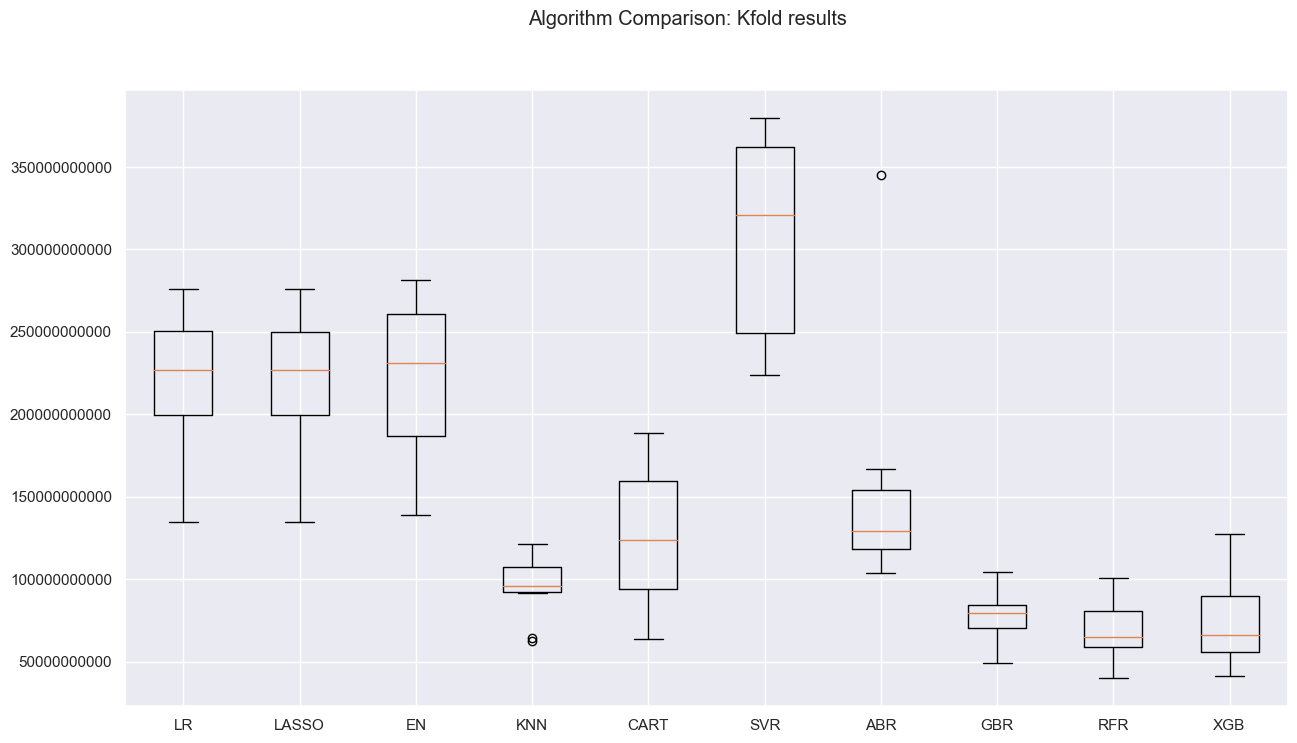

In [464]:
fig = plt.figure()

fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Random Forest for feature selection 


In [78]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [79]:
rf.feature_importances_

array([0.08673817, 0.04708993, 0.69570111, 0.12108736, 0.00507553,
       0.01048785, 0.03382004])

In [83]:
df_imp = pd.DataFrame({'imprt':rf.feature_importances_},index=X1.columns).sort_values('imprt',ascending=False)
df_imp

,imprt
sq,0.70
year,0.12
floor,0.09
rooms,0.05
city_Warszawa,0.03
city_Poznan,0.01
city_Krakow,0.01


<AxesSubplot:>

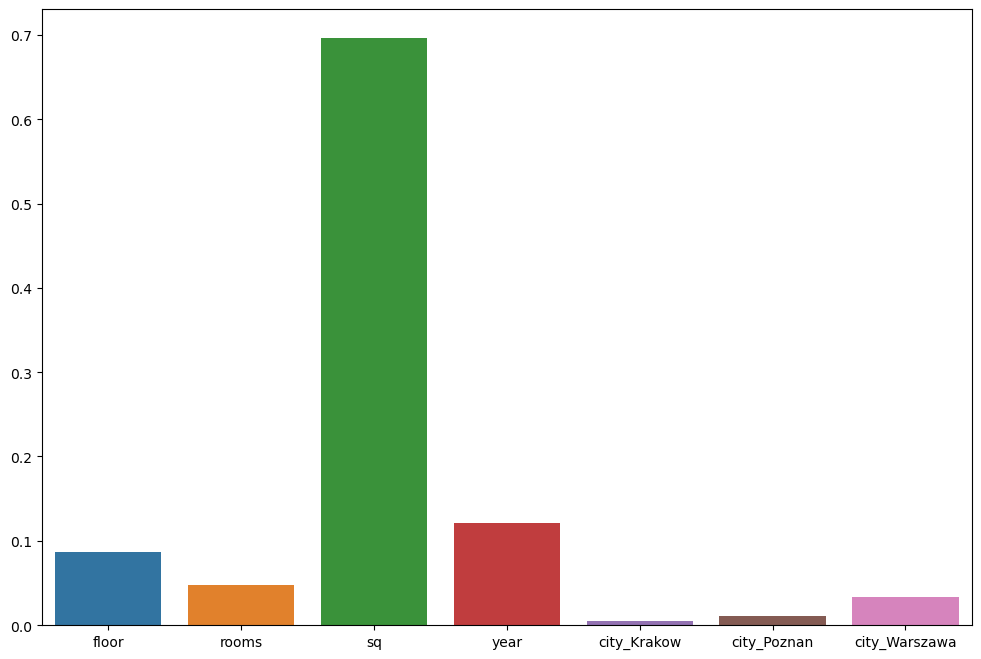

In [84]:
# df_imp.plot(kind='bar')
plt.figure(figsize=(12,8))
sns.barplot(y=rf.feature_importances_,x=X1.columns)

# Pipeline, GridSearchCV & Modelling

In [85]:
pipe = Pipeline([
    ("classifier", xgb.XGBRegressor())])

In [86]:
sp = [
    {"classifier": [xgb.XGBRegressor(),RandomForestRegressor()],
    "classifier__n_estimators": [50,100,120,150]},
    {"classifier": [Lasso(),ElasticNet()],
    "classifier__alpha" : [0.1, 1.0, 5.0, 10.0]}
    ]

In [87]:
grid = GridSearchCV(pipe, sp, cv=5, verbose=0)

In [88]:
bm = grid.fit(X_train,y_train)

In [89]:
bm.best_params_

{'classifier': RandomForestRegressor(n_estimators=120),
 'classifier__n_estimators': 120}

### RandomForestRegressor

In [90]:
ml = RandomForestRegressor(n_estimators=120)
ml.fit(X_train,y_train)
p = ml.predict(X_test)

In [91]:
np.sqrt(mean_squared_error(y_test,p))

242584.87853448276

In [92]:
from sklearn.metrics import r2_score
print(r2_score(y_test, p))

0.7764658926475989


### XGBRegressor

In [93]:
ml2 = xgb.XGBRegressor(n_estimators=120)
ml2.fit(X_train,y_train)
p2 = ml2.predict(X_test)

In [94]:
np.sqrt(mean_squared_error(y_test,p2))

244991.1548243024

In [95]:
np.sqrt(mean_squared_error(y_test,p2))

244991.1548243024

In [96]:
print(r2_score(y_test, p2))

0.7720092871842771


### Deep Learning

In [97]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [98]:
from keras.callbacks import EarlyStopping

In [99]:
X_train.shape

(16634, 7)

In [100]:
X_train.shape[0]

16634

In [101]:
X_train.shape[1]

7

In [155]:
nm = Sequential()

In [283]:
nm.add(Dense(units=50, activation='relu'))
nm.add(Dropout(0.05))
nm.add(Dense(units=30, activation='relu'))
nm.add(Dense(units=30, activation='relu'))
nm.add(Dense(units=1, activation='relu'))

In [284]:
es = EarlyStopping(monitor='val_loss',patience=50)

In [285]:
nm.compile(loss='mse',optimizer='adam')

In [286]:
history = nm.fit(x=X_train,y=y_train.values,epochs=500,batch_size=128, callbacks=[es],validation_data=(X_test,y_test.values))


Epoch 1/500
130/130 [==============================] - 4s 5ms/step - loss: 290876555264.0000 - val_loss: 2146438479872.0000
Epoch 2/500
130/130 [==============================] - 0s 4ms/step - loss: 229307809792.0000 - val_loss: 2710409576448.0000
Epoch 3/500
130/130 [==============================] - 0s 4ms/step - loss: 228226564096.0000 - val_loss: 2527305662464.0000
Epoch 4/500
130/130 [==============================] - 0s 4ms/step - loss: 233346908160.0000 - val_loss: 2972135718912.0000
Epoch 5/500
130/130 [==============================] - 1s 4ms/step - loss: 224552943616.0000 - val_loss: 2073667698688.0000
Epoch 6/500
130/130 [==============================] - 0s 4ms/step - loss: 231530283008.0000 - val_loss: 3309857931264.0000
Epoch 7/500
130/130 [==============================] - 0s 4ms/step - loss: 225392115712.0000 - val_loss: 2798398996480.0000
Epoch 8/500
130/130 [==============================] - 0s 4ms/step - loss: 229946048512.0000 - val_loss: 3121415454720.0000
Epoch 9/

130/130 [==============================] - 1s 4ms/step - loss: 228984946688.0000 - val_loss: 3449786466304.0000
Epoch 67/500
130/130 [==============================] - 1s 4ms/step - loss: 226589327360.0000 - val_loss: 2429174677504.0000
Epoch 68/500
130/130 [==============================] - 1s 4ms/step - loss: 227007791104.0000 - val_loss: 3020839714816.0000
Epoch 69/500
130/130 [==============================] - 1s 4ms/step - loss: 228174512128.0000 - val_loss: 2119046266880.0000
Epoch 70/500
130/130 [==============================] - 1s 4ms/step - loss: 224554598400.0000 - val_loss: 2449147691008.0000
Epoch 71/500
130/130 [==============================] - 0s 4ms/step - loss: 226393030656.0000 - val_loss: 3288183603200.0000
Epoch 72/500
130/130 [==============================] - 1s 4ms/step - loss: 226069889024.0000 - val_loss: 2471304101888.0000
Epoch 73/500
130/130 [==============================] - 1s 4ms/step - loss: 226983329792.0000 - val_loss: 2035891044352.0000
Epoch 74/500


130/130 [==============================] - 0s 4ms/step - loss: 229879840768.0000 - val_loss: 2692377477120.0000
Epoch 132/500
130/130 [==============================] - 0s 4ms/step - loss: 225122648064.0000 - val_loss: 2092276908032.0000
Epoch 133/500
130/130 [==============================] - 0s 4ms/step - loss: 224352370688.0000 - val_loss: 1919093440512.0000
Epoch 134/500
130/130 [==============================] - 0s 4ms/step - loss: 226370125824.0000 - val_loss: 2113337163776.0000


<AxesSubplot:>

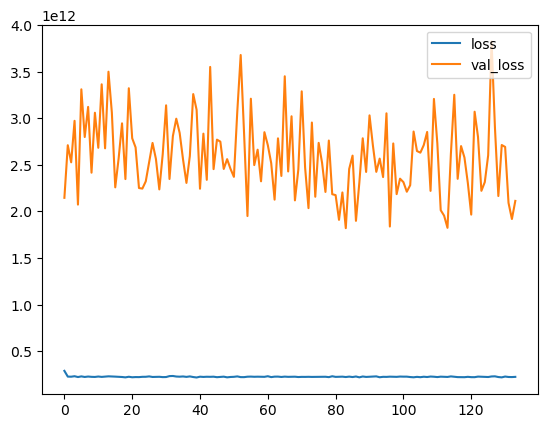

In [287]:
model_loss = pd.DataFrame(history.history)
model_loss.plot()

In [288]:
predictions = nm.predict(X_test)

223/223 [==============================] - 0s 621us/step


In [289]:
np.sqrt(mean_squared_error(y_test,predictions))

1453732.0752911735

In [290]:
y_test.mean()

641935.129754558

In [291]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [292]:
explained_variance_score(y_test,predictions)

-6.0584196131287795

In [293]:
print(r2_score(y_test, predictions))

-7.027588320484433
